In [4]:
!pip install nfl_data_py

In [6]:
import nfl_data_py as nfl

In [7]:
import pandas as pd
import nfl_data_py as nfl

In [11]:
pbp_py = nfl.import_pbp_data([2023])

2023 done.
Downcasting floats.


In [12]:
filter_crit = 'play_type == "pass" & air_yards.notnull()'

pbp_py_p = (
    pbp_py.query(filter_crit)
    .groupby(["passer_id", "passer"])
    .agg({"air_yards": ["count", "mean"]})
)

#pbp_py_p["rank"] = pbp_py_p["air_yards_mean"].rank(ascending=False)

In [13]:
pbp_py_p.columns = list(map("_".join, pbp_py_p.columns.values))

sort_crit = "air_yards_count > 100"
pbp_py_p["rank"] = pbp_py_p["air_yards_mean"].rank(ascending=False)
print(
    pbp_py_p.query(sort_crit)\
    .sort_values(by="air_yards_mean", ascending=[False])\
    .to_string()
)

                                air_yards_count  air_yards_mean  rank
passer_id  passer                                                    
00-0039152 W.Levis                          253       10.624506  16.0
00-0033319 N.Mullens                        147        9.387755  19.0
00-0033537 D.Watson                         170        9.370588  20.0
00-0033869 M.Trubisky                       106        9.273585  21.0
00-0039163 C.Stroud                         547        8.978063  24.0
00-0026158 J.Flacco                         250        8.896000  27.0
00-0028118 T.Taylor                         174        8.862069  28.0
00-0036389 J.Hurts                          573        8.574171  29.0
00-0034855 B.Mayfield                       643        8.542768  31.0
00-0031800 T.Heinicke                       134        8.477612  32.0
00-0034857 J.Allen                          646        8.448916  33.0
00-0034796 L.Jackson                        515        8.446602  34.0
00-0036264 J.Love   

In [14]:
filter_crit = 'play_type == "pass" & air_yards.notnull()'

pbp_py_p = (
    pbp_py.query(filter_crit)
    .groupby(["passer_id", "passer"])
    .agg({"air_yards": ["count", "mean"]})
)

#pbp_py_p["rank"] = pbp_py_p["air_yards_mean"].rank(ascending=False)

pbp_py_p.columns = list(map("_".join, pbp_py_p.columns.values))

# Filter the DataFrame
sort_crit = "air_yards_count > 100"
filtered_pbp_py_p = pbp_py_p.query(sort_crit)

# Add a rank column based on air_yards_mean in descending order
filtered_pbp_py_p["rank"] = filtered_pbp_py_p["air_yards_mean"].rank(ascending=False)

# Reorder the columns to make 'rank' the first column
columns = ["rank"] + [col for col in filtered_pbp_py_p.columns if col != "rank"]
filtered_pbp_py_p = filtered_pbp_py_p[columns]


# Sort and display the DataFrame
print(
    filtered_pbp_py_p\
    .sort_values(by="air_yards_mean", ascending=[False])\
    .to_string()
)

                                rank  air_yards_count  air_yards_mean
passer_id  passer                                                    
00-0039152 W.Levis               1.0              253       10.624506
00-0033319 N.Mullens             2.0              147        9.387755
00-0033537 D.Watson              3.0              170        9.370588
00-0033869 M.Trubisky            4.0              106        9.273585
00-0039163 C.Stroud              5.0              547        8.978063
00-0026158 J.Flacco              6.0              250        8.896000
00-0028118 T.Taylor              7.0              174        8.862069
00-0036389 J.Hurts               8.0              573        8.574171
00-0034855 B.Mayfield            9.0              643        8.542768
00-0031800 T.Heinicke           10.0              134        8.477612
00-0034857 J.Allen              11.0              646        8.448916
00-0034796 L.Jackson            12.0              515        8.446602
00-0036264 J.Love   

C:\Users\helle\AppData\Local\Temp\ipykernel_21084\3637633813.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pbp_py_p["rank"] = filtered_pbp_py_p["air_yards_mean"].rank(ascending=False)


## Filtering and Selecting Columns

In [15]:
import pandas as pd
import numpy as np
import nfl_data_py as nfl

In [16]:
pbp_py = nfl.import_pbp_data([2023])

2023 done.
Downcasting floats.


### Filter out game data

In [17]:
gb_det_2023_py = \
    pbp_py.query("home_team == 'GB' & away_team == 'DET'")

### Select some pass related columns

In [18]:
gb_det_2023_pass_py = \
    gb_det_2023_py[
        ["posteam", "yards_after_catch", "air_yards", "pass_location", "qb_scramble"]\
]
    


In [19]:
print(gb_det_2023_pass_py.describe())

       yards_after_catch  air_yards  qb_scramble
count          42.000000  64.000000   177.000000
mean            3.452381   8.171875     0.005650
std             4.875036   9.393603     0.075165
min            -2.000000  -7.000000     0.000000
25%             0.000000   3.000000     0.000000
50%             2.000000   6.000000     0.000000
75%             5.000000  12.250000     0.000000
max            23.000000  43.000000     1.000000


### Group by team

In [21]:
gb_det_2023_team_grouped = gb_det_2023_pass_py.groupby("posteam").agg({
    "yards_after_catch": "mean", 
    "air_yards": "mean", 
    "qb_scramble": "sum"
})

print(gb_det_2023_team_grouped)

         yards_after_catch  air_yards  qb_scramble
posteam                                           
DET               5.052631   6.428571          1.0
GB                2.130435   9.527778          0.0


In [22]:
print(gb_det_2023_pass_py.groupby("posteam").agg(
    {
        "air_yards": ["min", "max", "mean", "median", "std", "var", "count"]
    })\
    .sort_values(by=("posteam"), ascending=[True])
     )

        air_yards                                                    
              min   max      mean median        std         var count
posteam                                                              
DET          -7.0  20.0  6.428571    6.0   7.724078   59.661377    28
GB           -4.0  43.0  9.527778    6.5  10.415609  108.484924    36


### Add a second variable

In [23]:
print(gb_det_2023_pass_py.groupby("posteam").agg(
    {
        "yards_after_catch": ["min", "max", "mean", "median", "std", "var", "count"],
        "air_yards": ["min", "max", "mean", "median", "std", "var", "count"]
    }))

        yards_after_catch                                                    \
                      min   max      mean median       std        var count   
posteam                                                                       
DET                  -2.0  23.0  5.052631    3.0  6.518978  42.497078    19   
GB                    0.0   8.0  2.130435    1.0  2.341413   5.482213    23   

        air_yards                                                      
              min   max      mean median        std         var count  
posteam                                                                
DET          -7.0  20.0  6.428571    6.0   7.724078   59.661377    28  
GB           -4.0  43.0  9.527778    6.5  10.415609  108.484924    36  


## Practicing filters and sorting by looking at one specific game


In [25]:
gb_det_2023_py_pass = pbp_py\
    .query("home_team == 'GB' & away_team == 'DET'")\
    [['posteam', 'yards_after_catch', 'air_yards', 'pass_location', 'qb_scramble']]

print(gb_det_2023_py_pass.query("yards_after_catch > 15"))

     posteam  yards_after_catch  air_yards pass_location  qb_scramble
9374     DET               23.0       12.0        middle          0.0


## Cleaning Sample Data
### (changing data types)

In [26]:
import pandas as pd

wrong_number = \
    pd.DataFrame({"col1": ["a", "b"],
                 "col2": ["1A", "12"], 
                 "col3": [2, 44]})



In [27]:
wrong_number.loc[wrong_number.col2 == "1A", "col2"] = 10
wrong_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col1    2 non-null      object
 1   col2    2 non-null      object
 2   col3    2 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 176.0+ bytes


In [28]:
wrong_number["col2"] = \
    pd.to_numeric(wrong_number["col2"])
wrong_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col1    2 non-null      object
 1   col2    2 non-null      int64 
 2   col3    2 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 176.0+ bytes


In [29]:
wrong_number.describe()

,col2,col3
count,2.000000,2.000000
mean,11.000000,23.000000
std,1.414214,29.698485
min,10.000000,2.000000
25%,10.500000,12.500000
50%,11.000000,23.000000
75%,11.500000,33.500000
max,12.000000,44.000000


## Merging Datasets

In [30]:
city_data = \
    pd.DataFrame({"city": ['DET', 'GB', 'HOU'],
                 "team": ['Lions', 'Packers', 'Texans']})
schedule = \
    pd.DataFrame({"home": ["GB", "DET"],
                 "away": ["DET", "HOU"]})

In [31]:
city_data

,city,team
0,DET,Lions
1,GB,Packers
2,HOU,Texans


In [32]:
print(schedule.merge(city_data, how = 'outer', 
                    left_on = 'home', right_on = 'city')
              .sort_values('team', ascending = True)
     )

  home away city     team
1  DET  HOU  DET    Lions
0   GB  DET   GB  Packers
2  NaN  NaN  HOU   Texans


#### How would you merge the two data sets to just print the home and away cities and home and away teams?

In [33]:
step_1 = schedule.merge(city_data, how = 'left',
                            left_on = 'home', right_on = 'city')
step_2 = step_1.rename(columns = 
                      {"team": "home_team"}).drop(columns = 'city')
step_3 = step_2.merge(city_data, how = 'left', 
                         left_on = "away", right_on = "city")
schedule_name = step_3.rename(columns = 
                             {"team": "away_team"}).drop(columns = 'city')
print(schedule_name)

  home away home_team away_team
0   GB  DET   Packers     Lions
1  DET  HOU     Lions    Texans


## Analyze Stable vs Unstable QB Play

#### Obtain and Filter Data

In [34]:
import pandas as pd
import numpy as np
import nfl_data_py as nfl

In [35]:
seasons = range(2016, 2024 + 1)
pbp_py = nfl.import_pbp_data(seasons)

2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
2023 done.
2024 done.
Downcasting floats.


In [36]:
##Filter to just passing plays
pbp_py_p = pbp_py\
    .query("play_type == 'pass' & air_yards.notnull()")\
    .reset_index()
    

In [37]:
## Categorize long and short passes

pbp_py_p["pass_length_air_yards"] = np.where(
    pbp_py_p["air_yards"] >= 20, "long", "short"
)

## Replace missing values

pbp_py_p["passing_yards"] = \
    np.where(
        pbp_py_p["passing_yards"].isnull(), 0, pbp_py_p["passing_yards"]
    )

In [38]:
## Examine passing_yards field

pbp_py_p["passing_yards"]\
    .describe()

count    161371.000000
mean          7.176853
std           9.672085
min         -24.000000
25%           0.000000
50%           5.000000
75%          11.000000
max          98.000000
Name: passing_yards, dtype: float64

In [39]:
## Examine data for different lengths of pass yards

pbp_py_p\
    .query('pass_length_air_yards == "short"')["passing_yards"]\
    .describe()

count    142380.000000
mean          6.514391
std           7.710880
min         -24.000000
25%           0.000000
50%           5.000000
75%          10.000000
max          95.000000
Name: passing_yards, dtype: float64

In [40]:
## Group by "pass_length_air_yards"

summary_stats = pbp_py_p["passing_yards"].groupby(pbp_py_p["pass_length_air_yards"]).describe()
print(summary_stats)

                          count       mean        std   min  25%  50%   75%  \
pass_length_air_yards                                                         
long                    18991.0  12.143489  17.908195   0.0  0.0  0.0  26.0   
short                  142380.0   6.514391   7.710880 -24.0  0.0  5.0  10.0   

                        max  
pass_length_air_yards        
long                   98.0  
short                  95.0  


In [41]:
## Examine EPA Data

pbp_py_p\
    .query('pass_length_air_yards == "short"')["epa"]\
    .describe()

count    142379.000000
mean          0.116298
std           1.429460
min         -13.031219
25%          -0.610094
50%          -0.009362
75%           0.954769
max           8.241420
Name: epa, dtype: float64

### Creating Passing Yard Frequency Histogram


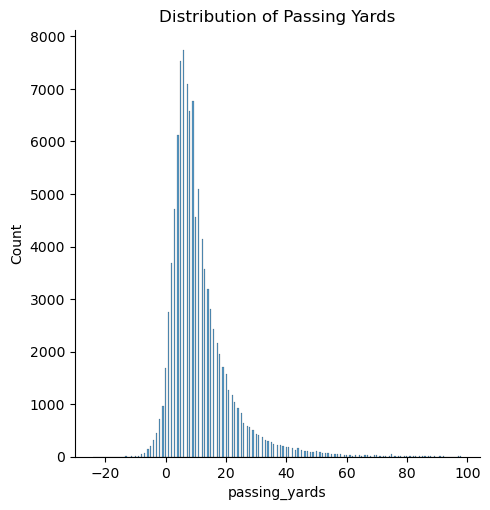

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# create the plot
sns.displot(data = pbp_py, x = "passing_yards")

# add a title
plt.title('Distribution of Passing Yards')

# show the plot
plt.show()

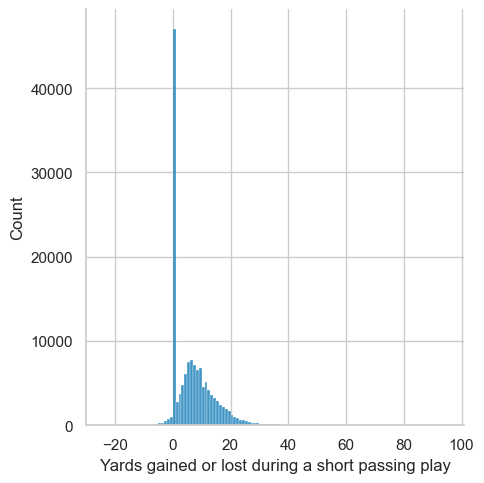

In [43]:
## Histogram of passing yards gained or lost on short passes

# adjusting plot style and look
sns.set_theme(style = "whitegrid", palette = "colorblind")

# filter out short passes
pbp_py_p_short = \
    pbp_py_p\
    .query('pass_length_air_yards == "short"')

# create histogram with custom axis labels
pbp_py_hist_short = \
    sns.displot(data = pbp_py_p_short,
                   binwidth = 1,
                   x = "passing_yards")
pbp_py_hist_short\
    .set_axis_labels(
    "Yards gained or lost during a short passing play", "Count")

plt.show()
    


## Boxplot

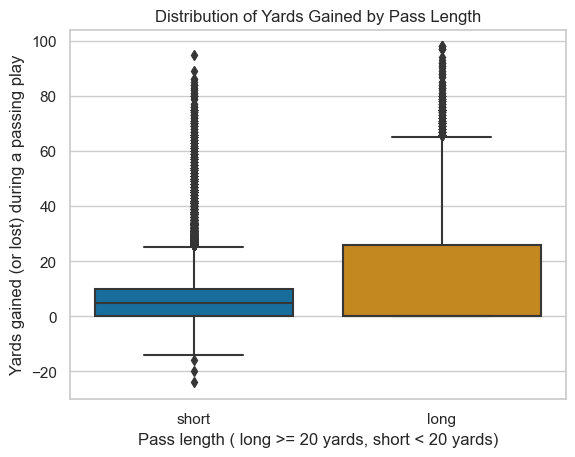

In [44]:
## Distribution of pass lengths for short and long passes

pass_boxplot =\
    sns.boxplot(data = pbp_py_p, 
                   x = "pass_length_air_yards", 
                   y = "passing_yards")
pass_boxplot.set(
    xlabel = "Pass length ( long >= 20 yards, short < 20 yards)",
    ylabel= "Yards gained (or lost) during a passing play")

plt.title('Distribution of Yards Gained by Pass Length')

plt.show()

## Player level stability of Passing Yards per Attempt

In [45]:
pbp_py_p_s = \
    pbp_py_p\
        .groupby(["passer_id", "passer", "season"])\
        .agg({"passing_yards": ["mean", "count"]})

## collapse columns to make dataframe easier to handle
pbp_py_p_s.columns = list(map("_".join, pbp_py_p_s.columns.values))

## rename columns to names that make sense
pbp_py_p_s\
    .rename(columns = {'passing_yards_mean': 'ypa',
                        'passing_yards_count': 'n'},
                inplace = True)
                 
    
## analyze data
pbp_py_p_s\
    .query("n >= 100")\
    .sort_values(by = ["ypa"], ascending = False)\
    .head()



,,,ypa,n
passer_id,passer,season,,
00-0023682,R.Fitzpatrick,2018,9.617887,246
00-0026143,M.Ryan,2016,9.442155,631
00-0033106,J.Goff,2024,9.263941,269
00-0037834,B.Purdy,2023,9.222628,548
00-0034796,L.Jackson,2024,9.072556,317


In [46]:
## Deep passes vs short passes

pbp_py_p_s_pl = \
    pbp_py_p\
    .groupby(["passer_id", "passer", "season", "pass_length_air_yards"])\
    .agg({"passing_yards": ["mean", "count"]})

## flatten column name and rename columns so they are easier to work with

pbp_py_p_s_pl.columns=\
    list(map("_".join, pbp_py_p_s_pl.columns.values))
pbp_py_p_s_pl\
    .rename(columns = {'passing_yards_mean': 'ypa',
                        'passing_yards_count': 'n'},
                   inplace = True)

## Reset index
pbp_py_p_s_pl.reset_index(inplace = True)

## select only short passes from QBs with >= 100 attempts or long passes with >= 30
q_value = (
    '(n >= 100 & ' +
        'pass_length_air_yards == "short") | ' +
        '(n > 30 & ' +
        'pass_length_air_yards == "long")'
    )

pbp_py_p_s_pl = pbp_py_p_s_pl.query(q_value).reset_index()

## create list of columns to save and a new dataframe with only the new columns

cols_save =\
    ["passer_id", "passer", "season", "pass_length_air_yards", "ypa"]
air_yards_py =\
    pbp_py_p_s_pl[cols_save].copy()

## copy air_yards_py to create lag that we will compare data to
air_yards_lag_py =\
    air_yards_py\
    .copy()
air_yards_lag_py["season"] += 1
air_yards_lag_py\
    .rename(columns = {'ypa': 'ypa_last'},
               inplace = True)

## join the two dataframes
pbp_py_p_s_pl =\
    air_yards_py\
    .merge(air_yards_lag_py, 
              how = 'inner',
              on = ['passer_id', 'passer', 'season', 'pass_length_air_yards'])

## check current progress by looking at just one specific QB
print(
    pbp_py_p_s_pl[["pass_length_air_yards", "passer", "season", "ypa", "ypa_last"]]\
    .query('passer == "A.Rodgers"')\
    .sort_values(["passer", "pass_length_air_yards", "season"])\
    .to_string()
)


   pass_length_air_yards     passer  season        ypa   ypa_last
47                  long  A.Rodgers    2019  12.092592  12.011628
49                  long  A.Rodgers    2020  16.097826  12.092592
51                  long  A.Rodgers    2021  14.302631  16.097826
53                  long  A.Rodgers    2022  10.312500  14.302631
45                 short  A.Rodgers    2017   6.041475   6.693523
46                 short  A.Rodgers    2018   6.697446   6.041475
48                 short  A.Rodgers    2019   6.207224   6.697446
50                 short  A.Rodgers    2020   6.718447   6.207224
52                 short  A.Rodgers    2021   6.777083   6.718447
54                 short  A.Rodgers    2022   6.239130   6.777083


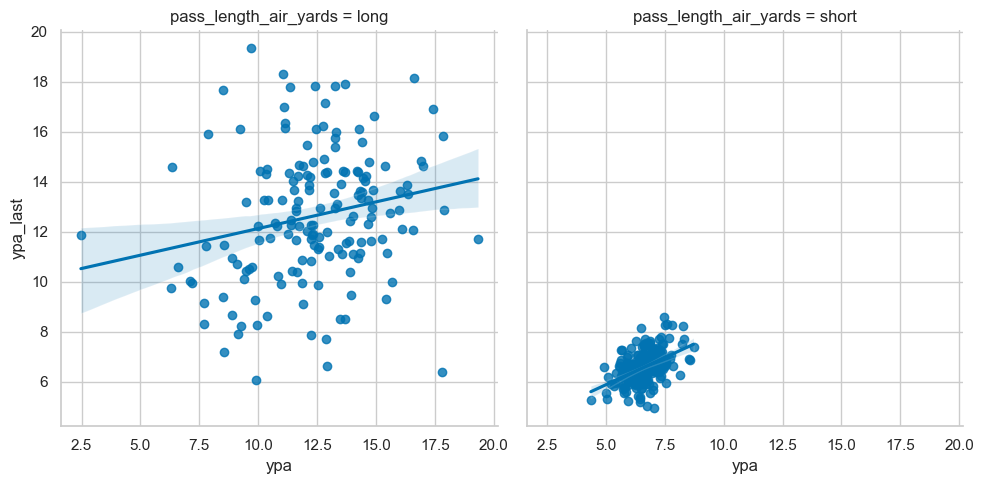

In [52]:
## Create a scatterplot of the data, comparing the YPA of this year vs the YPA of previous year
sns.lmplot(data = pbp_py_p_s_pl, 
              x = 'ypa', 
              y = 'ypa_last', 
              col = 'pass_length_air_yards')
plt.show()

In [53]:
## Correlation data for the graphs above
pbp_py_p_s_pl\
    .query('ypa.notnull() & ypa_last.notnull()')\
    .groupby('pass_length_air_yards')[["ypa", "ypa_last"]]\
    .corr()

ypa  ypa_last
pass_length_air_yards                             
long                  ypa       1.000000  0.212968
                      ypa_last  0.212968  1.000000
short                 ypa       1.000000  0.463570
                      ypa_last  0.463570  1.000000

In [ ]:
## Based on the correlations seen here, we can confirm that although throwing deep passes is more valuable,
    ##short passes are more stable from one year to the next and may be more useful in evaluating a QB

## Punting Analysis


In [266]:
import nfl_data_py as nfl
import pandas as pd

# Load play-by-play data for the seasons you want to analyze
seasons = range(2016, 2024 + 1)
pbp_data = nfl.import_pbp_data(seasons)

# Check available columns to find relevant punting stats
print(pbp_data.columns)

punt_data = pbp_data.query("play_type == 'punt'")

print(punt_data["yards_gained"].describe())

# Summary of return yards on punts
print(punt_data["return_yards"].describe())

2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
2023 done.
2024 done.
Downcasting floats.
Index(['play_id', 'game_id', 'old_game_id_x', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'defense_players', 'n_offense', 'n_defense', 'ngs_air_yards',
       'time_to_throw', 'was_pressure', 'route', 'defense_man_zone_type',
       'defense_coverage_type', 'old_game_id'],
      dtype='object', length=392)
count    19537.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: yards_gained, dtype: float64
count    19537.000000
mean         3.675744
std          7.966461
min        -13.000000
25%          0.000000
50%          0.000000
75%          5.000000
max         99.000000
Name: return_yards, dtype: float64


In [83]:
punt_data["net_kick_distance"] = punt_data["kick_distance"] - punt_data["return_yards"]

# Summary statistics for net punt distance
print(punt_data["net_kick_distance"].describe())

# Calculate the average net punt distance, excluding blocked punts
avg_net_punt_no_blocks = punt_data.query("punt_blocked == 0")["net_kick_distance"].mean()
print(f"Average Net Punt Distance (Excluding Blocks): {avg_net_punt_no_blocks:.2f} yards")

count    19537.000000
mean        42.171982
std         10.869616
min        -50.000000
25%         37.000000
50%         43.000000
75%         49.000000
max         84.000000
Name: net_kick_distance, dtype: float64
Average Net Punt Distance (Excluding Blocks): 42.39 yards


<Figure size 1200x600 with 0 Axes>

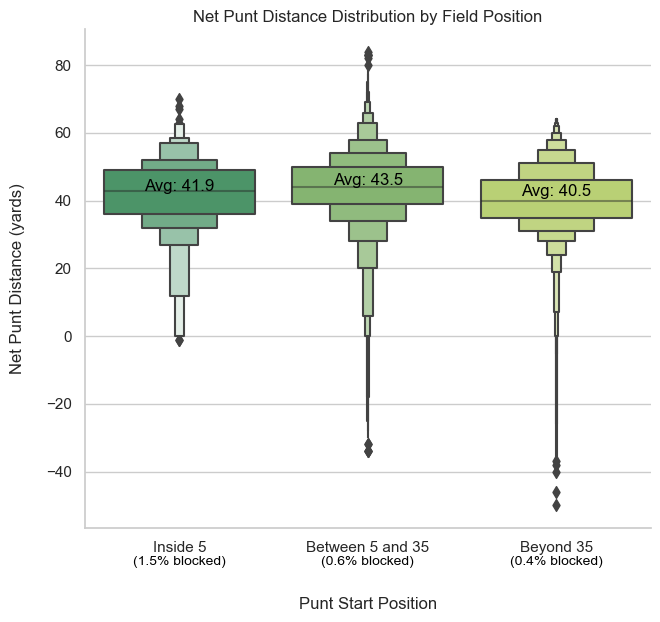

In [302]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have columns 'kick_distance' and 'return_yards', calculate net_distance
punt_data['net_distance'] = punt_data['kick_distance'] - punt_data['return_yards']

# Classify punts into categories: Inside 5, Between 5 and 35
punt_data['start_position'] = punt_data['yardline_100'].apply(
    lambda x: 'Inside 5' if x >= 95 
              else 'Between 5 and 35' if 95 > x >= 65 
              else 'Beyond 35'  # optional, in case you want to include this category
)

# Make sure the 'start_position' column is categorical to separate data properly
punt_data['start_position'] = pd.Categorical(punt_data['start_position'], categories=['Inside 5', 'Between 5 and 35', 'Beyond 35'])

# Calculate the average net punt distance for each category (instead of kick_distance)
average_values = punt_data.groupby('start_position')['net_distance'].mean()

# Calculate blocked punt percentage for each category (net distance = 0 or null)
blocked_percentage = punt_data.groupby('start_position').apply(lambda x: ((x['net_distance'].isnull()) | (x['net_distance'] == 0)).sum() / len(x) * 100)

# Create the box plot for net_distance instead of kick_distance
plt.figure(figsize=(12, 6))
g = sns.catplot(x='start_position', y='net_distance', data=punt_data, palette='summer', kind='boxen', dodge=True)

# Adding labels and title
plt.title('Net Punt Distance Distribution by Field Position', pad=5, fontsize=12)
plt.xlabel('Punt Start Position', labelpad=30)
plt.ylabel('Net Punt Distance (yards)', labelpad=15)

# Get the y-limits of the plot
ylim = plt.ylim()

# Add average and blocked punt percentage as text on the plot
for i, position in enumerate(['Inside 5', 'Between 5 and 35', 'Beyond 35']):
    avg_val = average_values[position]
    blocked_pct = blocked_percentage[position]
    
    # Place average value text above the box plot
    plt.text(i, avg_val + 1, f'Avg: {avg_val:.1f}', ha='center', color='black')
    
    # Place blocked punt percentage text below the x-axis labels
    plt.text(i, ylim[0] - 11, f'({blocked_pct:.1f}% blocked)', ha='center', color='black', fontsize=10)

# Adjust the figure size (optional)
g.fig.set_size_inches(7, 6)

# Show the plot
plt.show()
